In [1]:
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing
import numpy as np

In [2]:
personal_data_path = "https://raw.githubusercontent.com/kripso/IAU_Project/master/Dataset/personal_train.csv"
medical_data_path = "https://raw.githubusercontent.com/kripso/IAU_Project/master/Dataset/other_train.csv"
personal_data = pd.read_csv(personal_data_path)
medical_data = pd.read_csv(medical_data_path)

In [3]:
personal_data=personal_data.rename(columns={personal_data.columns.to_list()[0]: "index"})
personal_data.head()

,index,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\nEast Andrew, OH 53211",58,Female,18/01/1961
1,1,Ernest Kline,"391 Ball Road Suite 961\nFlowersborough, IN 57550",56,Male,1962-11-08
2,2,Harold Hendriks,"8702 Vincent Square\nNew Jerryfurt, CO 30614",52,Male,1967-04-18
3,3,Randy Baptiste,"2751 Harris Crossroad\nWest Ashley, CA 30311",64,Male,55-09-04
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\nWest Kyle, CO 77139",66,Male,1952-12-05


In [4]:
medical_data = medical_data.rename(columns={medical_data.columns.to_list()[0]: "index"})
medical_data.head()

,index,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,...,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
0,0,Joel Martinez,"2014 Fitzpatrick Springs\nJimmybury, MI 83417",9.672970,Transport-moving,Married-civ-spouse,f,NaN,Husband,14.678821,...,201410.0,0.0,>50K,"{'mean_glucose':'117.4375','std_glucose':'47.6...",Philippines,1977.0,2.445652,45.0,White,Private
1,1,Mike Delacruz,"PSC 6835, Box 2308\nAPO AP 84084",8.175772,Other-service,Never-married,f,9.0,Own-child,17.521978,...,85625.0,0.0,<=50K,"{'mean_glucose':'132.8984375','std_glucose':'4...",United-States,0.0,2.633779,22.0,White,Private
2,2,Tony Kell,"847 Martin Locks Apt. 982\nEast Lauratown, NH ...",4.498688,Prof-specialty,Divorced,f,11.0,Not-in-family,40.829288,...,211022.0,0.0,>50K,"{'mean_glucose':'123.546875','std_glucose':'69...",United-States,0.0,9.512542,40.0,White,Private
3,3,Clarence Archer,"6376 Christine Hollow Suite 091\nDunnshire, HI...",0.531520,Sales,Married-civ-spouse,f,10.0,Husband,77.672185,...,291147.0,0.0,<=50K,"{'mean_glucose':'136.0625','std_glucose':'47.1...",United-States,0.0,60.436455,50.0,White,Private
4,4,Bradford Hayek,"7115 Snyder Key Apt. 041\nWest Tina, DE 78012",3.257489,Craft-repair,Divorced,f,9.0,Not-in-family,49.288231,...,149118.0,0.0,<=50K,"{'mean_glucose':'116.546875','std_glucose':'45...",United-States,0.0,14.475753,40.0,White,Private


In [5]:
column_one = personal_data['address'].str.split(', ',expand=True)[0]
column_two_and_three = personal_data['address'].str.split(', ',expand=True)[1]
column_two = column_two_and_three.str.split(' ',expand=True)[0]
column_three = column_two_and_three.str.split(' ',expand=True)[1]

In [6]:
print(len(column_one),len(column_two),len(column_three))
personal_data['address'] = column_one
personal_data['state'] = column_two
personal_data['postal_code'] = column_three

3933 3933 3933


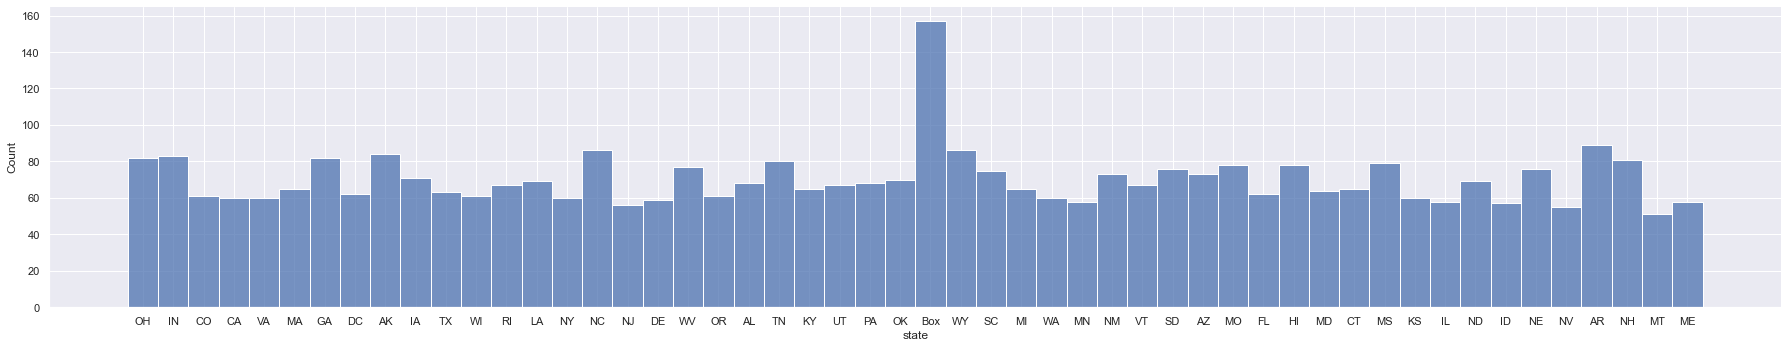

In [55]:
sns.set_theme(style="darkgrid")
# data=penguins, x="flipper_length_mm", hue="species", multiple="stack"
sns.displot(data=personal_data['state'].dropna(),aspect = 5)
# sns.boxplot(x="state", y=[1,10,100,1000],
#             hue="sex", palette=["m", "g"],
#             data=personal_data.dropna(),aspect = 5)

<AxesSubplot:xlabel='sex', ylabel='age'>

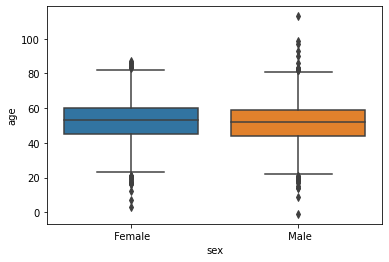

In [8]:
# plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot('sex', 
            'age', 
            data=personal_data)
# personal_data.age.value_counts().plot(kind='bar')
# pylab.xticks(rotation=90)